## Predicting Gas EUR

**Problem Overview:**

The goal is to predict the Estimated Ultimate Recovery (EUR) of natural gas from wellbore data using an appropriate machine learning algorithm.  This can be helpful for reservoir engineers in estimating the total recoverable gas volume from a well, which is crucial for production planning and economic analysis. 

**Objectives:**

* Develop a machine learning model that accurately predicts gas EUR based on wellbore attributes.
* Achieve a high degree of correlation between the predicted EUR and the actual EUR values.
* Identify the most influential wellbore attributes for gas EUR through feature importance analysis.

**Data:**

* **Source:** A simulated dataset containing information for 507 dry gas horizontal multistage fractured wells in a shale asset.
* **Target variable:** Gas EUR (continuous variable representing estimated ultimate recovery in some unit)
* **Input Features:**
    * **Geology:** 
        - Porosity (%)
        - Thickness (ft)
        - Water Saturation (%)
        -  Pressure Gradient (psi/ft)
    * **Drilling:** 
        - Lateral Length (ft) 
        - Well Spacing (ft)
        - Updip/Downdip (categorical variable)
    * **Completion:** 
        - Proppant/Foot (#/ft)
        - Stage Spacing (ft)
        - Fluid/Foot (bbl/ft)
        - Injection Rate (bbl/minute)
        - Instantaneous Shut-in Pressure (ISIP) (psi)
        - Percentage of linear gel (%)

---
## Provide your solution below:

In [71]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
# correlation matrix
df= pd.read_csv(r'C:\Users\NEW LAP\Desktop\spring 2024\ML\assignment 2\assignment_2_data.csv')
df.head()

,Stage Spacing,bbl/ft,Well Spacing,Dip,Thickness,Lateral Length,Injection Rate,Porosity,ISIP,Water Saturation,Percentage of LG,Pressure Gradient,Proppant Loading,EUR
0,140,38,850,0,165,8543,64,8.3,8200,17.1,38.0,0.95,3012,13.3
1,140,30,900,0,174,8336,60,7.8,8061,16.0,59.3,0.95,2771,12.5
2,140,30,900,0,174,9361,65,7.8,8061,16.0,59.3,0.95,3067,16.9
3,140,30,950,0,175,9110,69,8.3,7922,15.7,66.9,0.95,3130,16.5
4,140,30,950,0,175,9310,67,8.3,7922,15.7,66.9,0.95,2991,17.4


In [73]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Stage Spacing      506 non-null    int64  
 1   bbl/ft             506 non-null    int64  
 2   Well Spacing       506 non-null    int64  
 3   Dip                506 non-null    int64  
 4   Thickness          506 non-null    int64  
 5   Lateral Length     506 non-null    int64  
 6   Injection Rate     506 non-null    int64  
 7   Porosity           506 non-null    float64
 8   ISIP               506 non-null    int64  
 9   Water Saturation   506 non-null    float64
 10  Percentage of LG   506 non-null    float64
 11  Pressure Gradient  506 non-null    float64
 12  Proppant Loading   506 non-null    int64  
 13  EUR                506 non-null    float64
dtypes: float64(5), int64(9)
memory usage: 55.5 KB


In [74]:
df_desc = df.describe()
df_desc

,Stage Spacing,bbl/ft,Well Spacing,Dip,Thickness,Lateral Length,Injection Rate,Porosity,ISIP,Water Saturation,Percentage of LG,Pressure Gradient,Proppant Loading,EUR
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,147.640316,35.134387,820.158103,0.069170,162.365613,8153.086957,63.079051,7.337549,7010.490119,19.213439,64.845455,0.930257,2567.065217,12.845455
std,18.392128,10.533197,135.736986,0.253994,15.471044,942.393981,7.250106,0.749451,1211.452205,3.198579,18.427813,0.046507,413.792220,3.067064
min,140.000000,30.000000,650.000000,0.000000,120.000000,4500.000000,55.000000,5.500000,5000.000000,15.000000,15.000000,0.750000,1100.000000,7.000000
25%,140.000000,30.000000,700.000000,0.000000,153.000000,7617.750000,57.000000,6.600000,5000.000000,16.800000,55.900000,0.940000,2317.500000,11.000000
50%,141.000000,30.000000,800.000000,0.000000,165.000000,8051.000000,61.000000,7.500000,7643.000000,17.700000,69.900000,0.950000,2642.000000,12.400000
75%,148.000000,36.000000,900.000000,0.000000,176.000000,8608.000000,69.000000,8.000000,7783.000000,24.100000,79.700000,0.950000,2897.750000,13.700000
max,330.000000,75.000000,1350.000000,1.000000,185.000000,11500.000000,80.000000,8.500000,8200.000000,25.000000,95.000000,0.950000,3200.000000,22.000000


In [75]:
df=df.astype(float)

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Stage Spacing      506 non-null    float64
 1   bbl/ft             506 non-null    float64
 2   Well Spacing       506 non-null    float64
 3   Dip                506 non-null    float64
 4   Thickness          506 non-null    float64
 5   Lateral Length     506 non-null    float64
 6   Injection Rate     506 non-null    float64
 7   Porosity           506 non-null    float64
 8   ISIP               506 non-null    float64
 9   Water Saturation   506 non-null    float64
 10  Percentage of LG   506 non-null    float64
 11  Pressure Gradient  506 non-null    float64
 12  Proppant Loading   506 non-null    float64
 13  EUR                506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


<Axes: >

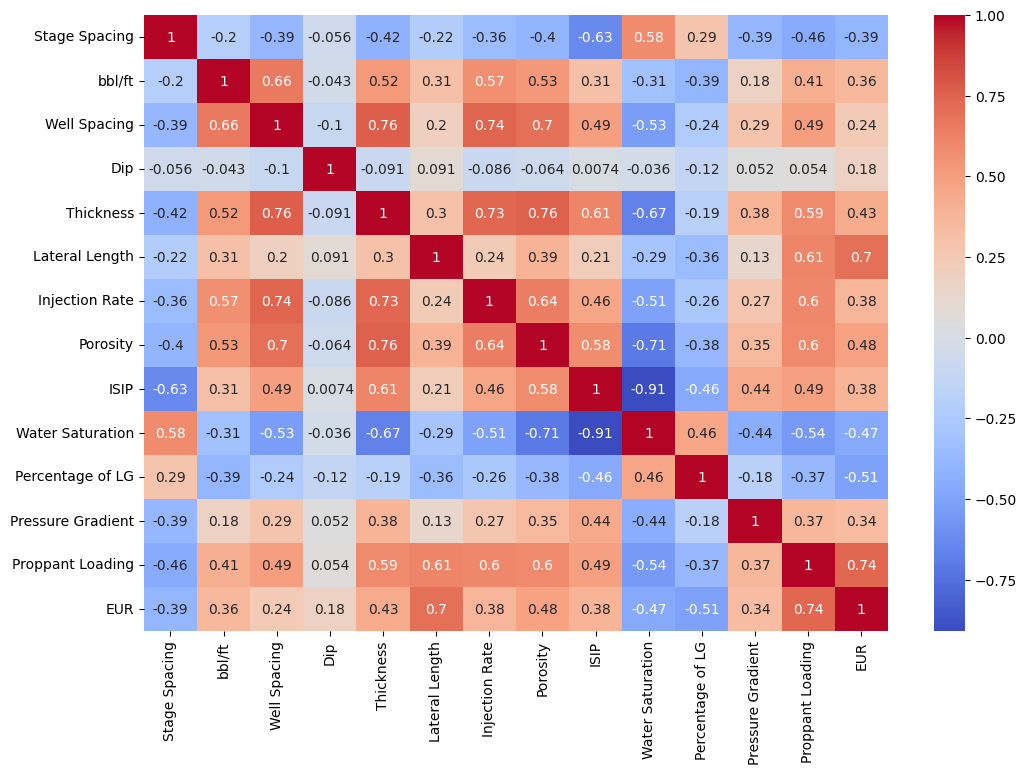

In [77]:
corr = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')


In [78]:
# 1. import the necessary modules for the selected model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# 2. create a linear regression model instance
lr = LinearRegression()

# 3. extarct X & Y 
x = df[['Proppant Loading','Percentage of LG','Water Saturation','Lateral Length']]
y = df['EUR']

# 4. pre-process the data (if necessary)

# 5. split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# 6. fit the model to the training data
lr.fit(x_train, y_train)

# 7. make predictions using the testing set
y_pred = lr.predict(x_test)

# 8. evaluate the model
print('Mean squared error (MSE): {:.2f}'.format(mean_squared_error(y_test, y_pred)))
print('Coefficient of determination (R2): {:.2f}'.format(r2_score(y_test, y_pred)))

# print the coefficients
print('Coefficients: \n', lr.coef_)
print('Intercept: \n', lr.intercept_)

Mean squared error (MSE): 3.04
Coefficient of determination (R2): 0.63
Coefficients: 
 [ 0.0030708  -0.03126281 -0.05177738  0.00124911]
Intercept: 
 -2.239399286854818


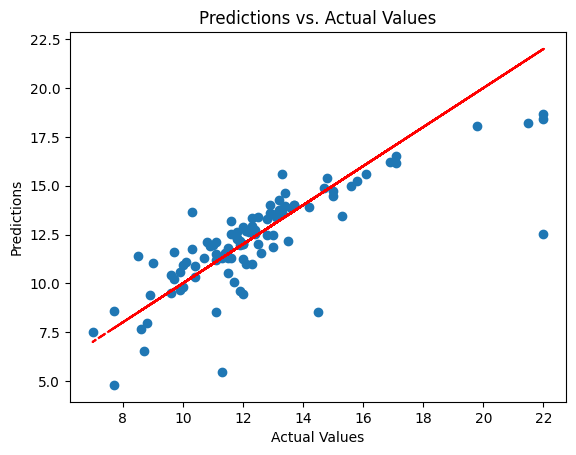

In [79]:
# plot the predictions vs. the actual values
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, '--r')
plt.xlabel('Actual Values')
plt.ylabel('Predictions')
plt.title('Predictions vs. Actual Values')
plt.show()

In [80]:
# 1. import the necessary modules for the selected model
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# 2. create the model
model = SVR()

# 3. extract X & Y
x = df.drop('EUR', axis=1)
y = df['EUR']

# 4. pre-process the data (if necessary)

# 5. split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# 6. fit the model
grid_params = {
    'kernel': ['rbf'],
    'C': [0.1, 1, 10, 50, 100],
    'gamma': [0.1, 1, 10, 50, 100]
}
grid_search = GridSearchCV(estimator=model, param_grid=grid_params, cv=5, verbose=2, n_jobs=-1)
grid_search.fit(x_train, y_train)

# 7. make predictions
y_pred_train = grid_search.predict(x_train)
y_pred_test = grid_search.predict(x_test)

# 8. evaluate the model
print('Train MSE:', mean_squared_error(y_train, y_pred_train))
print('Train R2:', r2_score(y_train, y_pred_train))
print('Test MSE:', mean_squared_error(y_test, y_pred_test))
print('Test R2:', r2_score(y_test, y_pred_test))

# print the best parameters
print('Best Parameters:', grid_search.best_params_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
Train MSE: 0.009551537146625606
Train R2: 0.9990121339536476
Test MSE: 8.333241485898329
Test R2: -0.02563081330919359
Best Parameters: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}


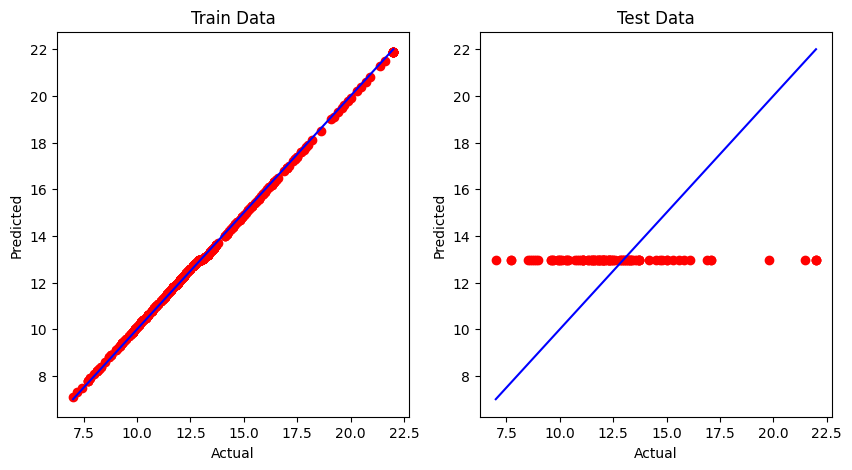

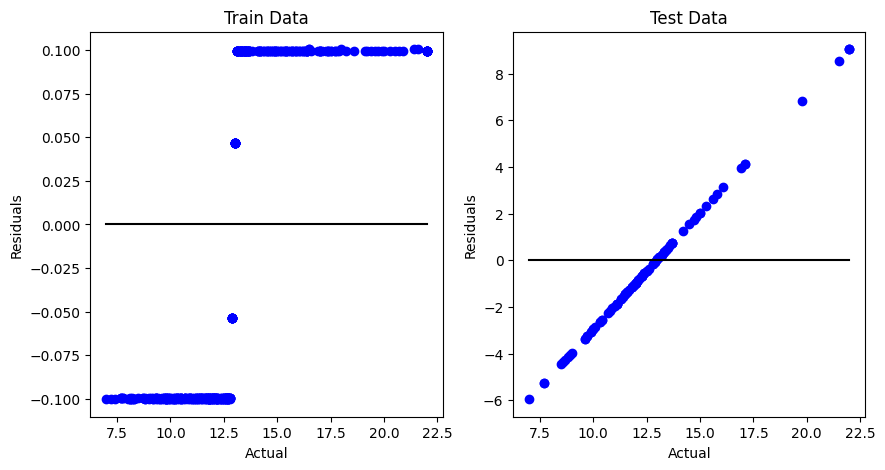

In [81]:
# 9. visualize the results
# 9.1. plot the actual vs predicted values
plt.figure(figsize=(10, 5))
# 45 degree line
x_45 = np.linspace(y.min(), y.max(), 100)
# training
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_pred_train, color='red')
plt.plot(x_45, x_45, color='blue')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Train Data')
# testing
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_test, color='red')
plt.plot(x_45, x_45, color='blue')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Test Data')
plt.show()

# 9.2. plot the residuals
plt.figure(figsize=(10, 5))
# training
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train - y_pred_train, color='blue')
plt.plot([y.min(), y.max()], [0, 0], color='black')
plt.xlabel('Actual')
plt.ylabel('Residuals')
plt.title('Train Data')
# testing
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test - y_pred_test, color='blue')
plt.plot([y.min(), y.max()], [0, 0], color='black')
plt.xlabel('Actual')
plt.ylabel('Residuals')
plt.title('Test Data')
plt.show()

In [93]:
# 1. import the necessary modules for the selected model
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# 2. create the model
model = SVR()

# 3. extract X & Y
x = df[['Proppant Loading','Percentage of LG','Water Saturation']]
y = df['EUR']
# 4. pre-process the data (if necessary)

# 5. split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# 6. fit the model
grid_params = {
    'kernel': ['rbf'],
    'C': [0.1, 1, 0.00001, 50, 10000],
    'gamma': [0.0000001, 1, 10, 50, 100]
}
grid_search = GridSearchCV(estimator=model, param_grid=grid_params, cv=9, verbose=6, n_jobs=-1)
grid_search.fit(x_train, y_train)

# 7. make predictions
y_pred_train = grid_search.predict(x_train)
y_pred_test = grid_search.predict(x_test)

# 8. evaluate the model
print('Train MSE:', mean_squared_error(y_train, y_pred_train))
print('Train R2:', r2_score(y_train, y_pred_train))
print('Test MSE:', mean_squared_error(y_test, y_pred_test))
print('Test R2:', r2_score(y_test, y_pred_test))

# print the best parameters
print('Best Parameters:', grid_search.best_params_)

Fitting 9 folds for each of 25 candidates, totalling 225 fits
Train MSE: 3.03572534680566
Train R2: 0.6860306409193972
Test MSE: 2.4690253583671744
Test R2: 0.6961196323581442
Best Parameters: {'C': 10000, 'gamma': 1e-07, 'kernel': 'rbf'}


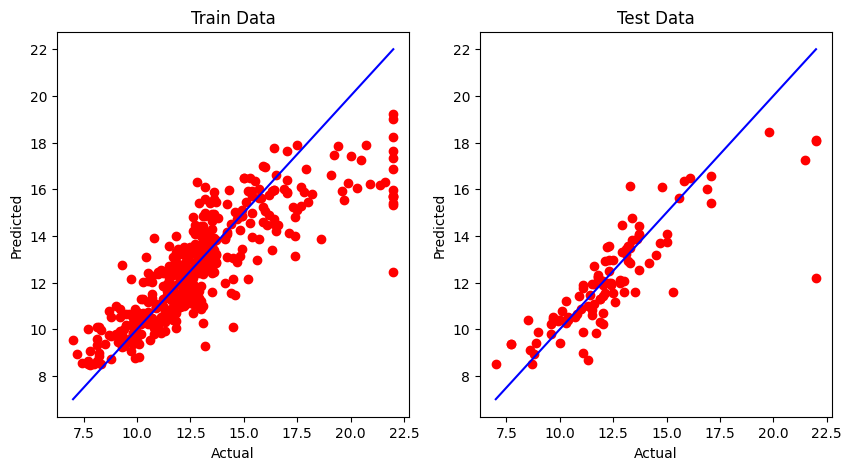

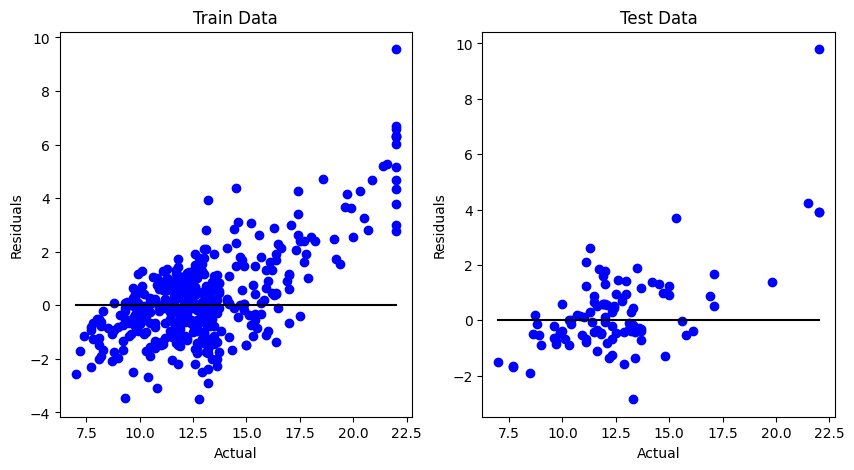

In [94]:
# 9. visualize the results
# 9.1. plot the actual vs predicted values
plt.figure(figsize=(10, 5))
# 45 degree line
x_45 = np.linspace(y.min(), y.max(), 100)
# training
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_pred_train, color='red')
plt.plot(x_45, x_45, color='blue')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Train Data')
# testing
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_test, color='red')
plt.plot(x_45, x_45, color='blue')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Test Data')
plt.show()

# 9.2. plot the residuals
plt.figure(figsize=(10, 5))
# training
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train - y_pred_train, color='blue')
plt.plot([y.min(), y.max()], [0, 0], color='black')
plt.xlabel('Actual')
plt.ylabel('Residuals')
plt.title('Train Data')
# testing
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test - y_pred_test, color='blue')
plt.plot([y.min(), y.max()], [0, 0], color='black')
plt.xlabel('Actual')
plt.ylabel('Residuals')
plt.title('Test Data')
plt.show()